# Example 2.2: Autocorrelation of dynamic response

In this example, we will consider the auto correlation of response quantities. Consider again the shear frame with two degrees of freedom from previous examples. We assume the mode shapes are already calculated:

$$
\left[ \begin{array}{cc} 
\phi_{11} & \phi_{12}  \\
\phi_{21} & \phi_{22} 
\end{array}\right]
=
\left[ \begin{array}{cc} 
0.62 & 1 \\
1 & -0.62
\end{array}\right]
$$

<center>
<img src="figures\shearframe.svg">
</center>

## Stochastic response

We have not yet looked at the calculation of the auto correlation of the response provided that we know the auto correlation of the load. Therefore, we will simply assume the load is a Gaussian stochastic process, and that the auto correlation functions for the response in mode 1 $z_1(t)$ and mode 2 $z_2(t)$ are given as follows:

$$
R_{z_1}(\tau)=20^2 \cos(6\tau) \exp(-0.3|\tau|),
\quad
R_{z_2}(\tau)=15^2 \cos(16\tau) \exp(-|\tau|),
$$

Furthermore, in this example, assume that the cross-correlation is neglectable:

$$
R_{z_1 z_2}(\tau)\approx 0
$$

We start by plotting the auto correlation for the two modes.

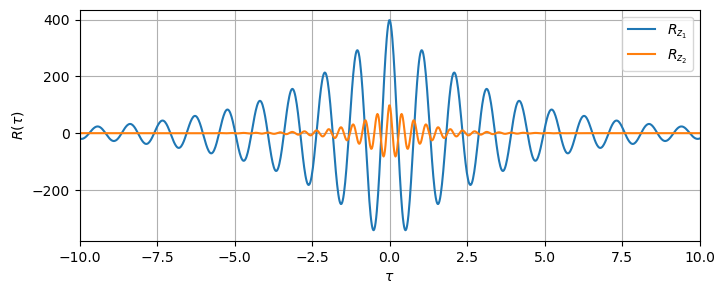

In [1]:
import numpy as np
from matplotlib import pyplot as plt

tau=np.linspace(-10,10,1000) # Time lag vector

R_z1=20**2*np.cos(6*tau)*np.exp(-0.3*np.abs(tau)) # Mode 1
R_z2=10**2*np.cos(16*tau)*np.exp(-np.abs(tau)) # Mode 2

plt.figure(figsize=(8,3))
plt.plot(tau,R_z1,label='$R_{z_1}$')
plt.plot(tau,R_z2,label='$R_{z_2}$')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R(\tau)$')
plt.xlim(-10,10)
plt.legend()
plt.grid()

## Task 1: find the auto and cross-correlation of the displacements $y_1$ and $y_2$

We know that the physical coordinates $\mathbf{y}(t)$ and modal coordinates $\mathbf{z(t)}$ are related by the modal transform:

$$ \mathbf{y}(t) = \mathbf{\Phi} \mathbf{z}(t) \quad \leftrightarrow \quad 
\left[ \begin{array}{c} 
y_{1}(t)  \\
y_{2}(t)
\end{array}\right]
=
\left[ \begin{array}{cc} 
\phi_{11} & \phi_{12}  \\
\phi_{21} & \phi_{22} 
\end{array}\right]
\left[ \begin{array}{c} 
z_{1}(t)  \\
z_{2}(t)
\end{array}\right]
$$

Let's start by considering $y_1(t)$ first:

$$ y_{1}(t) =\phi_{11}z_{1}(t) + \phi_{12}z_{2}(t) $$

We insert this into the auto-correlation and multiply out:

$$
\begin{align}
R_{y_1}(\tau) &= \text{E}[y_1(t)y_1(t+\tau)] \\
&= \text{E} \left[ \big(\phi_{11}z_{1}(t) + \phi_{12}z_{2}(t) \big) \big(\phi_{11}z_{1}(t+\tau) + \phi_{12}z_{2}(t+\tau) \big) \right] \\
&= \text{E} \left[ \phi_{11}z_{1}(t) \phi_{11}z_{1}(t+\tau) \right]
+ \text{E}  \left[ \phi_{11}z_{1}(t) \phi_{12}z_{2}(t+\tau) \right]
+ \text{E}  \left[ \phi_{12}z_{2}(t) \phi_{11}z_{1}(t+\tau) \right]
+ \text{E}  \left[ \phi_{12}z_{2}(t) \phi_{12}z_{2}(t+\tau) \right] \\
&= \phi_{11}^2 R_{z_1}(\tau) +  \phi_{12}^2 R_{z_2}(\tau)
\end{align}
$$

We can repeat the same process to obtain $R_{y_2}(\tau)$ and $R_{y_1 y_2}(\tau)$. However, we can also do it more compactly on matrix form. Consider the cross-correlation matrix for $y_1(t)$ and $y_2(t)$:

$$
\mathbf{R}_{\mathbf{y}}(\tau)
=
\left[ \begin{array}{cc} 
R_{y_1}(\tau) & R_{y_1 y_2}(\tau) \\
R_{y_2 y_1}(\tau) & R_{y_2}(\tau)
\end{array} \right]
=
\text{E} \left[
\mathbf{y}(t) \mathbf{y}(t+\tau)^\text{T}
\right]
$$

We insert the transformation to modal coordinates:

$$
\begin{align}
\text{E}
\left[
\mathbf{y}(t) \mathbf{y}(t+\tau)^\text{T}
\right]
&=
\text{E}
\left[
\left(
\mathbf{\Phi} \mathbf{z}(t)
\right)
\left(
\mathbf{\Phi} \mathbf{z}(t+\tau)
\right)^\text{T}
\right] \\
&=
\mathbf{\Phi}
\text{E}
\left[
\mathbf{z}(t)
 \mathbf{z}(t+\tau)^\text{T}
\right]
\mathbf{\Phi}^\text{T} \\
&=
\mathbf{\Phi}
\left[ \begin{array}{cc} 
R_{z_1 }(\tau) & R_{z_1 z_2}(\tau) \\
R_{z_2 z_1}(\tau) & R_{z_2}(\tau)
\end{array} \right]
\mathbf{\Phi}^\text{T}
\\
&=
\mathbf{\Phi}
\mathbf{R}_{\mathbf{z}}(\tau)
\mathbf{\Phi}^\text{T}
\end{align}
$$

We first plot the cross-correlation matrix for the modal coordinates to verify that it has been assigned correctly.

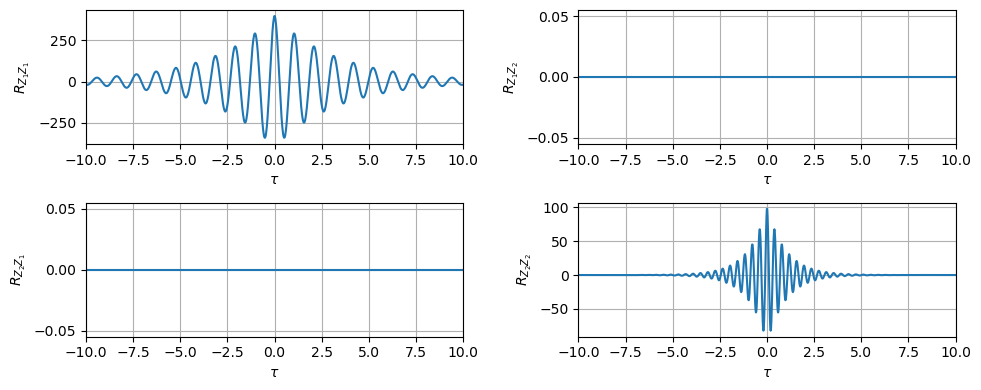

In [2]:
tau=np.linspace(-10,10,1000)
Rz=np.zeros((2,2,len(tau)))

Rz[0,0,:]=R_z1
Rz[1,1,:]=R_z2

fig, axs = plt.subplots(2, 2,figsize=(10, 4))

for i in np.arange(2):
    for j in np.arange(2):
        axs[i,j].plot(tau, Rz[i,j,:])
        axs[i,j].set_xlabel(r'$\tau$')
        axs[i,j].set_ylabel(r'$R_{Z_' + str(i+1) + 'Z_' + str(j+1) + '}$')
        axs[i,j].set_xlim(-10,10)
        axs[i,j].grid(True)

plt.tight_layout()

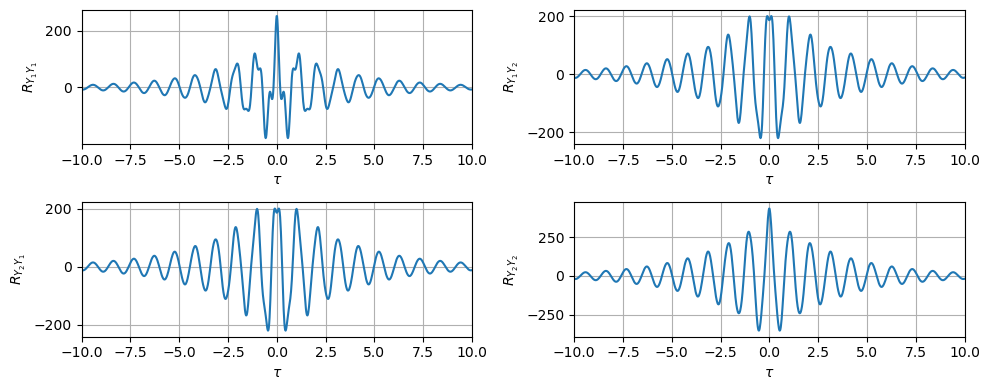

In [3]:
# Mode shape of shear frame calculated in previous examples
Phi=np.array([[0.62,1],
             [1,-0.62]])

# Calculate cross-correlation matrix for y
Ry=np.zeros((2,2,len(tau)))
for k in np.arange(len(tau)):
    Ry[:,:,k] = Phi @  Rz[:,:,k] @ Phi.T

# Plot cross-correlation matrix
fig, axs = plt.subplots(2, 2,figsize=(10, 4))

for i in np.arange(2):
    for j in np.arange(2):
        axs[i,j].plot(tau, Ry[i,j,:]) #/(np.max(Ry[i,i,:])**0.5*np.max(Ry[j,j,:])**0.5)
        axs[i,j].set_xlabel(r'$\tau$') 
        axs[i,j].set_ylabel(r'$R_{Y_' + str(i+1) + 'Y_' + str(j+1) + '}$')
        axs[i,j].set_xlim(-10,10)
        axs[i,j].grid(True)

plt.tight_layout()

Even though $z_1(t)$ and $z_2(t)$ was not correlated,  $y_1(t)$ and $y_2(t)$ will have a non-zero cross correlation.

## Task 2: find the auto correlation of the bending moment in the upper column

<center>
<img src="figures\Beam_bending.png"  width="500" >
</center>

When the load is stochastic, internal forces and stresses will also be stochastic since they are directly related to the displacements. Finding their statistics is straightforward. Next, we will calculate the auto correlation and the standard deviation for the bending moment.

Let $EI=10^6$ Nm$^2$ and $L=5$ m.

As shown in the figure above, the bending moment in the upper column is given by:

$$
M(t)=\dfrac{6EI}{L^2} \big( y_2(t)-y_1(t) \big)
$$

The moment depends on both displacements. To find the expression for the auto correlation for the moment, we start with its definition:

$$
R_{M}(\tau) = \text{E}[M(t)M(t+\tau)] 
$$

Next, we insert the formula and multiply out:

$$
\begin{align}
\text{E}[M(t)M(t+\tau)] 
&= \big( \dfrac{6EI}{L^2} \big)^2 \quad
\text{E} \left[ \big(y_{1}(t) - y_{2}(t) \big) \big( y_{1}(t+\tau) - y_{2}(t+\tau) \big) \right] \\
&=  \big( \dfrac{6EI}{L^2} \big)^2 \quad
\big( \text{E}\left[ y_{1}(t) y_{1}(t+\tau) \right]
- \text{E}\left[ y_{1}(t) y_{2}(t+\tau) \right]
- \text{E}\left[ y_{2}(t) y_{1}(t+\tau) \right]
+ \text{E}\left[ y_{2}(t) y_{2}(t+\tau) \right] \big) \\
&=  \big( \dfrac{6EI}{L^2} \big)^2 \quad\big( R_{y_1}(\tau) - R_{y_1 y_2}(\tau) - R_{y_2 y_1}(\tau) + R_{y_2}(\tau) \big)
\end{align}
$$

The result depends on the auto correlation for $y_1(t)$ and $y_2(t)$, as well as their cross-correlation. It is also possible consider the moment as a matrix transformation of the displacement vector:

$$
M(t)=\dfrac{6EI}{L^2}
\left[ \begin{array}{cc} 
-1 & 1
\end{array} \right] \cdot
\mathbf{y}(t)
$$

$$
\begin{align}
R_{M}(\tau) &= \text{E}
\left[
\mathbf{M}(t) \mathbf{M}(t+\tau)^\text{T}
\right] \\
&=
\text{E}
\left[
\left(
\dfrac{6EI}{L^2}
\left[ \begin{array}{cc} 
-1 & 1
\end{array} \right] \cdot
\mathbf{y}(t)
\right)
\left(
\dfrac{6EI}{L^2}
\left[ \begin{array}{cc} 
-1 & 1
\end{array} \right] \cdot
\mathbf{y}(t+\tau)
\right)^\text{T}
\right] \\
&= 
\big( \dfrac{6EI}{L^2} \big)^2 
\left[ \begin{array}{cc} 
-1 & 1
\end{array} \right] \cdot
\mathbf{R}_{\mathbf{y}}(\tau)
\cdot
\left[ \begin{array}{cc} 
-1 & 1
\end{array} \right]^\text{T}
\end{align}
$$

If this expression is multiplied out,  the same result is reached.


18085463054200.895


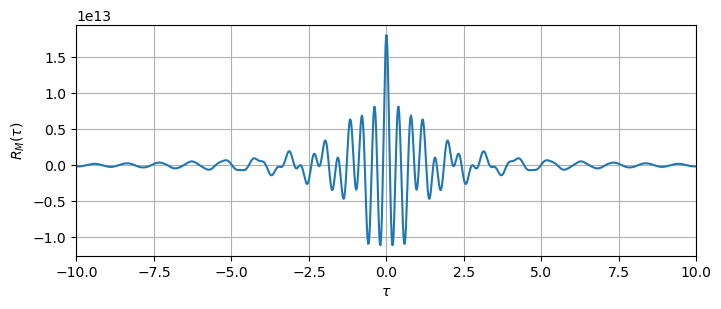

In [5]:
# Structural parameters
EI=10**6
L=5.0

# Calculate auto-correlation for bending moment
Rm=np.zeros((1,1,len(tau)))
for k in np.arange(len(tau)):
    Rm[:,:,k] = (6*EI/L**2)**2 * np.array([[-1,1]]) @  Ry[:,:,k] @ np.array([[-1,1]]).T

# Plot
plt.figure(figsize=(8,3))
plt.plot(tau,Rm[0,0,:])
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{M}(\tau)$')
plt.xlim(-10,10)
plt.grid()



The moment is mainly influenced both by mode 1 and 2 as there are contributions from two different frequencies.

We see that $R_M(\tau=0) \approx 1.8\cdot 10^{13}$, so the standard deviation of $M(t)$ will be $\sigma_M=\sqrt{1.8\cdot 10^{13}}=4.2\cdot 10^6$ Nm.

Since the displacements are zero mean, it follows that the moment will also be zero mean. $M(t)$ is therefore a Gaussian stochastic process $ \sim \mathcal{N}(\mu=0, \sigma=4.2 \cdot 10^6)$.
